In [14]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential, load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [15]:
IMAGE_SIZE = [224, 224]

In [16]:
train_directory='/content/archive (4)/train'
test_directory='/content/archive (4)/test'
val_directory='/content/archive (4)/valid'

In [17]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

In [18]:
model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=118, activation='softmax'))


In [19]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [21]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size=(32, 32),
                                                 batch_size=32,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size=(32, 32),
                                            batch_size=32,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 18748 images belonging to 118 classes.
Found 590 images belonging to 118 classes.


In [23]:
len(training_set), len(test_set)

(586, 19)

In [24]:
# Train the model
from tensorflow.keras.utils import to_categorical

r = model.fit(training_set,
              validation_data=test_set,
              epochs=75,#total epochs given are
              steps_per_epoch=len(training_set),
              validation_steps=len(test_set))

Epoch 1/75
586/586 [==============================] - 40s 64ms/step - loss: 4.5160 - accuracy: 0.0337 - val_loss: 4.2239 - val_accuracy: 0.0847
Epoch 2/75
586/586 [==============================] - 36s 61ms/step - loss: 4.0790 - accuracy: 0.0878 - val_loss: 3.9672 - val_accuracy: 0.1102
Epoch 3/75
586/586 [==============================] - 35s 60ms/step - loss: 3.8356 - accuracy: 0.1282 - val_loss: 3.6131 - val_accuracy: 0.1695
Epoch 4/75
586/586 [==============================] - 37s 63ms/step - loss: 3.6416 - accuracy: 0.1607 - val_loss: 3.4547 - val_accuracy: 0.1847
Epoch 5/75
586/586 [==============================] - 34s 58ms/step - loss: 3.4962 - accuracy: 0.1847 - val_loss: 3.3067 - val_accuracy: 0.2136
Epoch 6/75
586/586 [==============================] - 34s 59ms/step - loss: 3.3777 - accuracy: 0.2078 - val_loss: 3.2105 - val_accuracy: 0.2322
Epoch 7/75
586/586 [==============================] - 35s 59ms/step - loss: 3.2651 - accuracy: 0.2302 - val_loss: 3.1747 - val_accuracy:

In [25]:
model.save('LENETnewmodel1.h5')

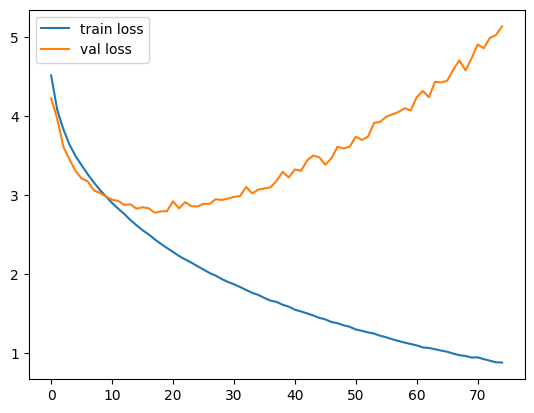

In [26]:
# Loss
plt.plot(r.history['loss'], label='train loss')
if 'val_loss' in r.history:
    plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

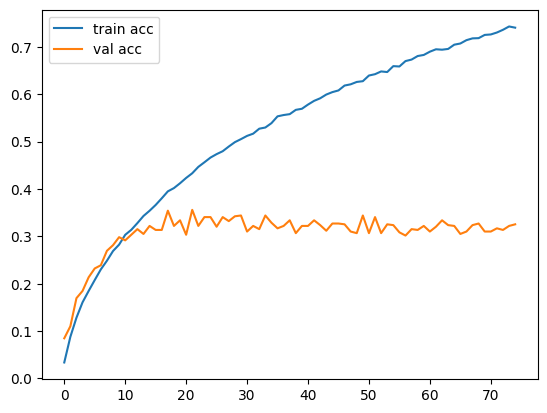

In [27]:
# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
if 'val_accuracy' in r.history:
    plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [28]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Input, Lambda, Dense, Flatten
import tensorflow as tf

model1 = load_model('./LENETnewmodel1.h5',compile=False)

In [29]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [30]:
def output(location):
    img = tf.keras.preprocessing.image.load_img(location, target_size=(32, 32), color_mode='grayscale')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    img = img.reshape(1, 32, 32, 1)
    answer = model.predict(img)
    y_class = answer.argmax(axis=-1)
    res = lab[y_class[0]]
    return res

1/1 [==============================] - 0s 152ms/step


'AZURE TANAGER'

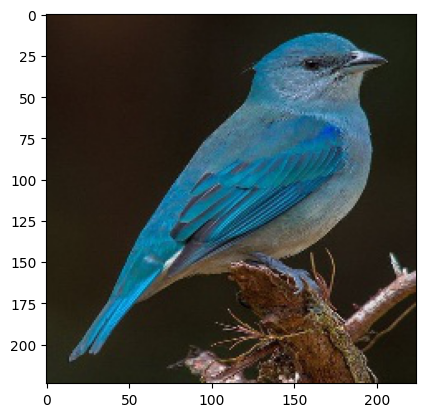

In [31]:
img='/content/archive (4)/valid/AZURE TANAGER/2.jpg'
pic=load_img('/content/archive (4)/valid/AZURE TANAGER/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 22ms/step


'BARN OWL'

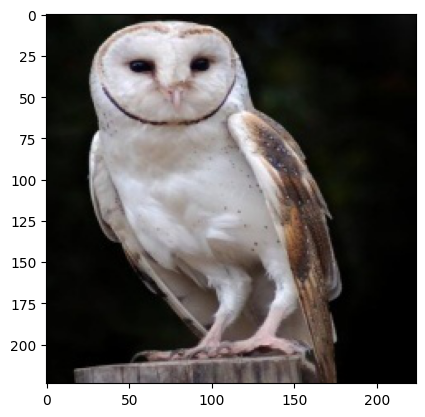

In [32]:
img='/content/archive (4)/valid/BARN OWL/4.jpg'
pic=load_img('/content/archive (4)/valid/BARN OWL/4.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 39ms/step


'AFRICAN CROWNED CRANE'

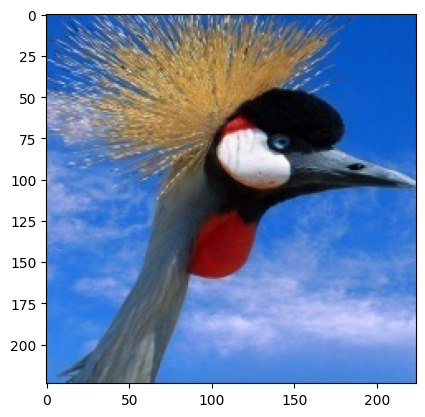

In [35]:
img='/content/archive (4)/valid/AFRICAN CROWNED CRANE/2.jpg'
pic=load_img('/content/archive (4)/valid/AFRICAN CROWNED CRANE/2.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)